# Tom and jerry, loading dataset

## Imports

In [1]:
import kagglehub

from pathlib import Path

import keras

from matplotlib import pyplot as plt

import numpy as np

import tensorflow as tf

/Users/ramin/miniconda3/envs/tensorflow_312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get the data

In [2]:
path = Path(kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification"))

In [3]:
data_path = path / "tom_and_jerry/tom_and_jerry"

## Load data

In [107]:
train_data, test_data = keras.utils.image_dataset_from_directory(
    data_path,
    seed=10,
    validation_split=0.2,
    subset="both",
    batch_size=12,
    image_size=(80, 190),
    shuffle=True,
)

Found 5478 files belonging to 4 classes.
Using 4383 files for training.
Using 1095 files for validation.


In [108]:
train_data_size = np.ceil(train_data.cardinality().numpy() * 0.8)

new_train = train_data.take(train_data_size)
new_valid = train_data.skip(train_data_size)

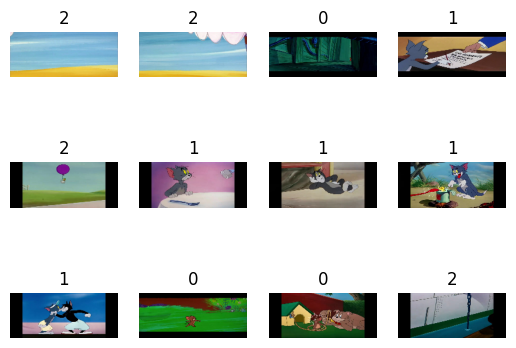

In [109]:
images, labels = next(iter(new_train.take(1)))

fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes_ravel[i].imshow(image.numpy().astype("uint8"))
    axes_ravel[i].set_axis_off()
    axes_ravel[i].set_title(f"{label}")


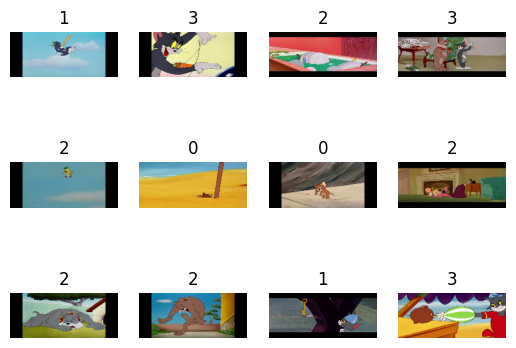

In [111]:
images, labels = next(iter(new_valid.take(1)))

fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes_ravel[i].imshow(image.numpy().astype("uint8"))
    axes_ravel[i].set_axis_off()
    axes_ravel[i].set_title(f"{label}")


In [35]:
print(new_train.cardinality().numpy(), new_valid.cardinality().numpy())

293 73


## Transfer learning

In [120]:
base_model = keras.applications.MobileNetV2(include_top=False)

base_model.trainable = False

/var/folders/wc/xkpkldpn6jl553z8rdtp0c_c0000gn/T/ipykernel_6159/3015679634.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(include_top=False)


In [121]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(80, 190, 3)),
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(4, activation="softmax"),
    ],
)


In [122]:
model.summary(show_trainable=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ mobilenetv2_1.00_224        │ (None, 2, 5, 1280)    │  2,257,984 │   N   │
│ (Functional)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_2 (Flatten)         │ (None, 12800)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 4)             │     51,204 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,309,188 (8.81 MB)

 Trainable params: 51,204 (200.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [123]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [124]:
model.fit(new_train, epochs=10, validation_data=(new_valid))

Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4062 - loss: 2.5370 - val_accuracy: 0.5040 - val_loss: 1.7976
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.6428 - loss: 1.2312 - val_accuracy: 0.5779 - val_loss: 1.5707
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.7045 - loss: 0.9454 - val_accuracy: 0.4821 - val_loss: 2.1341
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8059 - loss: 0.5573 - val_accuracy: 0.6436 - val_loss: 1.4532
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8454 - loss: 0.4453 - val_accuracy: 0.6540 - val_loss: 1.4015
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8073 - loss: 0.6236 - val_accuracy: 0.6078 - val_loss: 2.3126
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8746 - loss: 0.3901 - val_accuracy: 0.6574 - val_loss: 1.6197
Epoch 8/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.8598 - loss: 0.4361 - 

In [125]:
model.evaluate(test_data)

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6855 - loss: 1.7405


[1.5920451879501343, 0.696803629398346]